In [41]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
import matplotlib.pyplot as plt

In [14]:
with open("data/yumly_train.json", "r") as json_f:
    train_df = pd.DataFrame(json.load(json_f))

# with open("data/yumly_test.json", "r") as json_f:
#     test_df = pd.DataFrame(json.load(json_f))

ingredient_df = pd.concat([train_df], ignore_index=True)
ingredient_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [15]:
#np.unique([x.lower() for x in yummly_48k_df['cuisine']])
ingredient_df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [16]:
unique, counts = np.unique(np.concatenate(ingredient_df.ingredients), return_counts=True)

In [17]:
ingredient_counts = list(zip(unique, counts))

print(f"There are {len(unique)} ingredients for all recipes")
print("Here is the breakdown of how often each occurs")
for ingredient, count in sorted(ingredient_counts, key=lambda x: x[1], reverse=True):
    print(f"{ingredient}: {count}")

There are 6714 ingredients for all recipes
Here is the breakdown of how often each occurs
salt: 18049
olive oil: 7972
onions: 7972
water: 7457
garlic: 7380
sugar: 6434
garlic cloves: 6237
butter: 4848
ground black pepper: 4785
all-purpose flour: 4632
pepper: 4438
vegetable oil: 4385
eggs: 3388
soy sauce: 3296
kosher salt: 3113
green onions: 3078
tomatoes: 3058
large eggs: 2948
carrots: 2814
unsalted butter: 2782
extra-virgin olive oil: 2747
ground cumin: 2747
black pepper: 2627
milk: 2263
chili powder: 2036
oil: 1970
red bell pepper: 1939
purple onion: 1896
scallions: 1891
grated parmesan cheese: 1886
sesame oil: 1773
corn starch: 1757
ginger: 1755
baking powder: 1738
jalapeno chilies: 1730
dried oregano: 1707
chopped cilantro fresh: 1698
fresh lemon juice: 1679
diced tomatoes: 1624
fresh parsley: 1604
minced garlic: 1583
chicken broth: 1554
sour cream: 1539
cayenne pepper: 1523
brown sugar: 1503
fresh ginger: 1503
cooking spray: 1490
shallots: 1477
garlic powder: 1442
lime: 1439
lemon

In [46]:
mlb = MultiLabelBinarizer()
ingredient_matrix = mlb.fit_transform(ingredient_df['ingredients'])
ingredient_matrix = pd.DataFrame(ingredient_matrix, columns=mlb.classes_)

In [47]:
cuisines = ingredient_df['cuisine'].unique()
X = np.zeros((len(cuisines), ingredient_matrix.shape[1]))
for i, cuisine in enumerate(cuisines):
    prop_ingredients = ingredient_matrix[ingredient_df['cuisine'] == cuisine].sum(axis = 0)
    prop_ingredients = prop_ingredients / prop_ingredients.sum()
    X[i] = prop_ingredients


In [51]:
S

array([0.34992189, 0.14815278, 0.11152543, 0.0791948 , 0.07045731,
       0.06417698, 0.05548194, 0.05072695, 0.04744187, 0.04551807,
       0.04368882, 0.04120749, 0.04020451, 0.03707124, 0.03667899,
       0.02990908, 0.0290822 , 0.02644715, 0.02589206, 0.02386155])

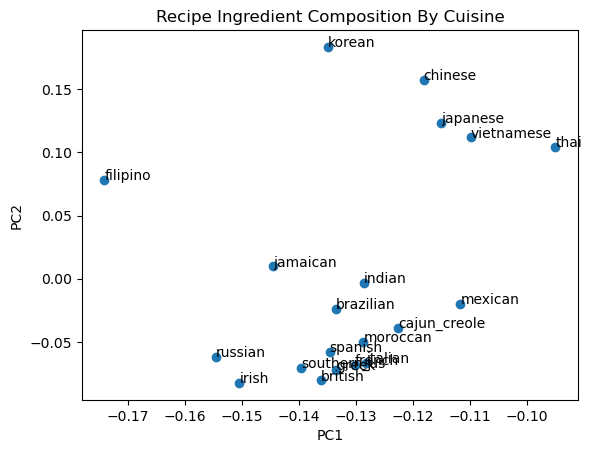

In [48]:
X_T = X.T
U, S, _ = np.linalg.svd(X_T)
w1 = U[:,0]
root_lam1 = S[0]**.5
w2 = U[:, 1]
root_lam2 = S[1]**.5

pc1 = (w1.T @ X_T) / root_lam1
pc2 = (w2.T @ X_T) / root_lam2

df = pd.DataFrame({'cuisine': cuisines, 'pc1': pc1, 'pc2':pc2})

plt.scatter(df['pc1'], df['pc2'])
for i, cuisine in enumerate(df['cuisine']):
  plt.annotate(cuisine, (df['pc1'][i], df['pc2'][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Recipe Ingredient Composition By Cuisine')
plt.show()

In [21]:
S

array([0.34992189, 0.14815278, 0.11152543, 0.0791948 , 0.07045731,
       0.06417698, 0.05548194, 0.05072695, 0.04744187, 0.04551807,
       0.04368882, 0.04120749, 0.04020451, 0.03707124, 0.03667899,
       0.02990908, 0.0290822 , 0.02644715, 0.02589206, 0.02386155])

In [22]:
S.sum ()

1.3566411166024692